<a href="https://colab.research.google.com/github/huongtravo0910/segtiment-analysis/blob/imdb_dataset_emotion_classification/Segtiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import data**

In [1]:
!gdown 1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s

Downloading...
From: https://drive.google.com/uc?id=1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s
To: /content/IMDB-Dataset.csv
100% 66.2M/66.2M [00:01<00:00, 60.5MB/s]


### **Process data**
Ở đây chúng ta sẽ thực hiện làm sạch dữ liệu thông qua các bước như: xoá thẻ html, xoá dấu câu,
xoá số, xoá các icon,...

In [3]:
!pip install nltk
!pip install bs4
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.4 MB/s eta 0:00:00


In [45]:
import pandas as pd
df = pd.read_csv('./IMDB-Dataset.csv')
df.head()
# Remove duplicate rows
df = df.drop_duplicates()

In [46]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [47]:
import re
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set(stopwords.words('english'))
# Expanding contractions
def expand_contractions(text):
  return contractions.fix(text)

# Function to clean data
def preprocess_text(text):
  wl = WordNetLemmatizer()
  soup = BeautifulSoup(text,"html.parser") # Removing html tags
  text = soup.get_text()
  text = expand_contractions(text) # Expanding chatwords and contracts clearing contractions

  emoji_clean = re.compile("["
            u"\U0001F600-\U0001F64F" # emoticons
            u"\U0001F300-\U0001F5FF" # symbols & pictographs
            u"\U0001F680-\U0001F6FF" # transport & map symbols
            u"\U0001F1E0-\U0001F1FF" # flags (iOS)
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            "]+", flags =re.UNICODE)
  text = emoji_clean.sub(r'',text)
  text = re.sub (r'\.(?=\ S)', '. ' ,text ) #add space after full stop
  text = re.sub(r'http\S+', '', text ) # remove urls
  text = "".join ([
  word.lower() for word in text if word not in string.punctuation
  ]) # remove punctuation and make text lowercase
  text = " ".join([wl.lemmatize ( word ) for word in text . split () if word not in stop and word .isalpha () ]) # lemmatize
  return text

df['review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-47-db5e9ab16be5>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text,"html.parser") # Removing html tags


In [48]:
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive


### **Analyze data**

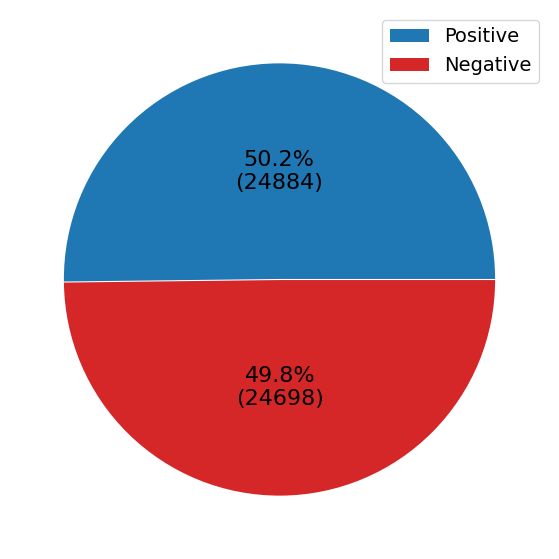

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Creating autocpt arguments
def func (pct,allvalues) :
  absolute = int(pct/100.* np.sum(allvalues))
  return "{:.1f}%\n({:d})".format(pct,absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos,freq_neg]


labels = ['positive', 'negative']
# Create pie chart
pie,ax = plt.subplots(figsize =[11 ,7])
plt.pie(x=data,autopct = lambda pct: func (pct,data) ,explode =[0.0025]*2, pctdistance =0.5,colors =[sns.color_palette()[0],'tab:red'], textprops ={'fontsize': 16})
# plt . title ( ’ Frequencies of sentiment labels ’, fontsize =14 , fontweight = ’ bold ’)
labels = [r'Positive', r'Negative']
plt.legend (labels , loc ="best", prop ={ 'size': 14})
pie.savefig ("PieChart.png")
plt.show ()

#### **Length of each class**


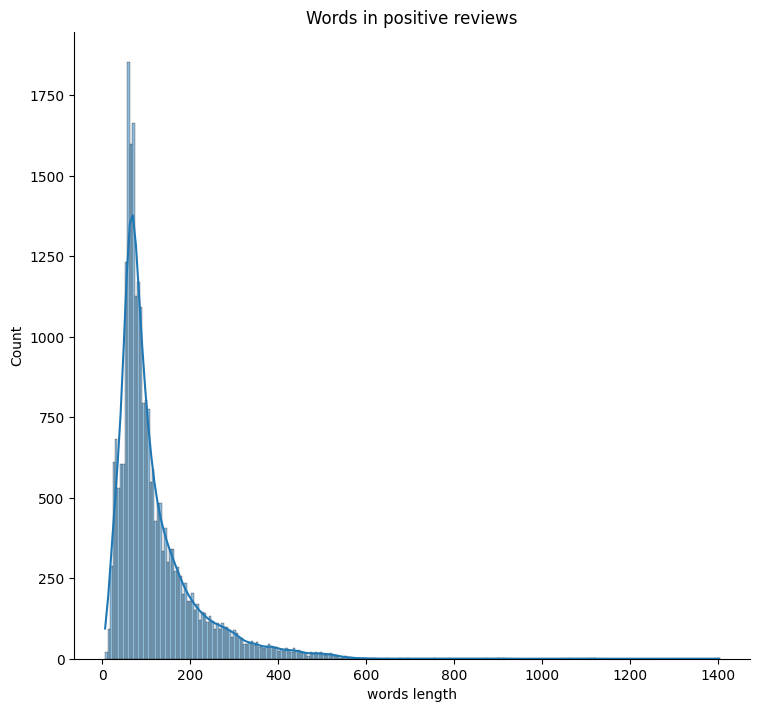

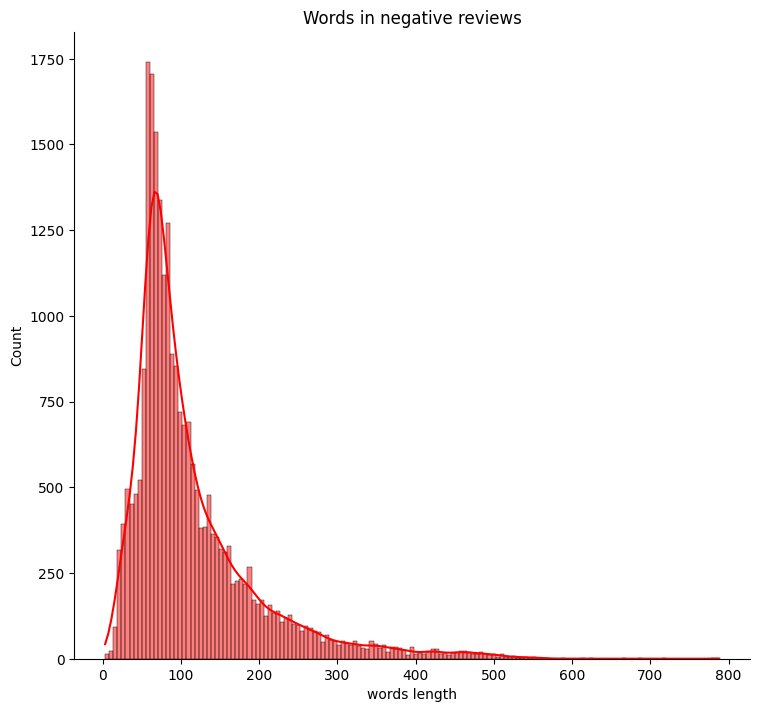

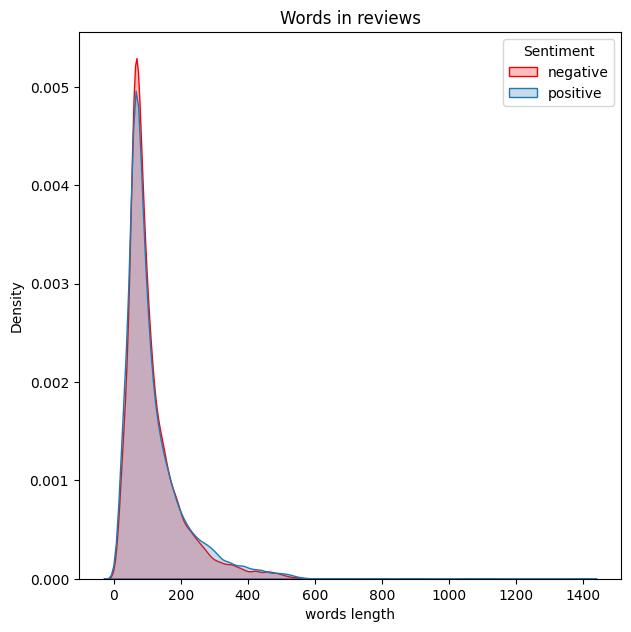

In [50]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

hist_positive = sns.displot(data = df_temp[df_temp['sentiment'] == 'positive'],x="words length", hue="sentiment",
                            kde=True , height =7, aspect =1.1, legend =False).set(title ='Words in positive reviews')
plt.show(hist_positive)

hist_negative = sns.displot(data = df_temp[df_temp['sentiment'] == 'negative'],x="words length", hue="sentiment",
                             kde=True , height =7 , aspect =1.1 , legend = False, palette =['red']).set(title ='Words in negative reviews')
plt.show(hist_negative)

plt.figure(figsize =(7 ,7.1))


kernel_distibution_number_words_plot = sns.kdeplot(data = df_temp,
                                                     x="words length", hue="sentiment",
                                                   fill =True , palette =[sns.color_palette ()[0],'red']).set(title ='Words in reviews')
plt.legend(title ='Sentiment', labels =[ 'negative', 'positive'])
plt.show (kernel_distibution_number_words_plot )


### **Split train and test**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder ()
y_data = label_encode.fit_transform(df['sentiment'])
x_data = df['review']

x_train, x_test, y_train, y_test = train_test_split (x_data , y_data , test_size =0.2 , random_state =42)

### **Vectorization**

In [54]:
tfidf_vectorizer = TfidfVectorizer(max_features =10000)
tfidf_vectorizer.fit(x_train,y_train)

x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

### **Train and analyze model**

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(criterion='entropy',random_state =42)
dt_classifier.fit(x_train_encoded,y_train)
y_pred = dt_classifier.predict(x_test_encoded)
accuracy_score(y_pred,y_test)

0.7093879197337905

In [56]:
rf_classifier = RandomForestClassifier(random_state =42)
rf_classifier.fit(x_train_encoded,y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy_score(y_pred,y_test)

0.8408792981748513